# Support Vector Machine
In this notebook, we fit a SVM to the regression problem of predicting mean activity based on non-wearable features taken from the UK biobank. 

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

In [2]:
from accel.read_data import load_data, load_xy, dataset_split, to_numpy_cont

## Data prep

In [3]:
features_of_interest = ['age_entry_years', 'sex', 'smoking', 'BMI', 'inc_ihd']
categorical_features = ['sex', 'smoking']
numeric_features = list(set(features_of_interest) - set(categorical_features))
response = 'acc.overall.avg' 

X, y = load_xy("../data/health_data/dataset-with-preprocessing-done.csv",
               features_of_interest,
               response
               )
#Check for null values
X[X.isnull().any(axis=1)] 

,age_entry_years,sex,smoking,BMI,inc_ihd


In [4]:
print(X.shape)
X.head()

(91243, 5)


,age_entry_years,sex,smoking,BMI,inc_ihd
0,73.722108,Female,Never,27.6685,0
1,65.785079,Male,Previous,30.0408,0
2,63.841205,Male,Previous,27.9744,0
3,59.041752,Male,Previous,31.1317,0
4,56.873374,Male,Previous,22.9938,0


In [5]:
# encode categorical variables
X_enc = pd.get_dummies(X, columns=categorical_features)
X_enc.head()

,age_entry_years,BMI,inc_ihd,sex_Female,sex_Male,smoking_Current,smoking_Never,smoking_Previous
0,73.722108,27.6685,0,1,0,0,1,0
1,65.785079,30.0408,0,0,1,0,0,1
2,63.841205,27.9744,0,0,1,0,0,1
3,59.041752,31.1317,0,0,1,0,0,1
4,56.873374,22.9938,0,0,1,0,0,1


In [6]:
X_cont = to_numpy_cont(X_enc)
y_cont = to_numpy_cont(y)
X_cont.flags["C_CONTIGUOUS"], y_cont.flags["C_CONTIGUOUS"]

(True, True)

In [7]:
# Split into training and testing, 80:20
X_train, X_test, y_train, y_test = dataset_split(X_cont, y_cont, 0.2)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (72994, 8)
Shape of test set: (18249, 8)


## Model

In [8]:
from time import time
from sklearn import svm
from accel.training import model_tune, score

Timing how long it takes to fit an SVM to different sizes of data. Keep in mind, there are 91243 observations.

In [26]:
Ns = np.arange(100,10001,500)
Ns

array([ 100,  600, 1100, 1600, 2100, 2600, 3100, 3600, 4100, 4600, 5100,
       5600, 6100, 6600, 7100, 7600, 8100, 8600, 9100, 9600])

In [27]:
reps = 5
times = np.zeros((reps,len(Ns)))

for r in range(reps):
    for i in range(len(Ns)):
        N = Ns[i]
        clf = svm.SVR()
        start = time()
        clf.fit(X_train[:N], y_train[:N ]) #train model and tim
        times[r,i] = time() - start

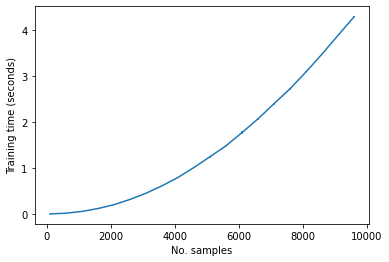

In [28]:
plt.errorbar(Ns, np.mean(times,axis=0), np.std(times,axis=0))
plt.xlabel("No. samples")
plt.ylabel("Training time (seconds)")
plt.show()

In [29]:
# fitting on full dataset
clf = svm.SVR()
start = time()
clf.fit(X_train, y_train) #train model and tim
time() - start

506.84323596954346

In [9]:
# define lists of params interested in

kernel = ['poly', 'rbf', 'sigmoid'] #type of kernel used
C = np.geomspace(1e-3,1,10) # Small C -> big regularisation.

params = {
    "kernel" : kernel,
    "C"      : C
}

In [11]:
# TO DO
clf = model_tune(svm.SVR(), params, X_train, y_train, 3)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


KeyboardInterrupt: 